In [1]:
import numpy as np
from sympy import *
from sympy.vector import CoordSys3D
from sympy.plotting.plot import plot3d_parametric_line, plot3d_parametric_surface
import matplotlib.pyplot as plt
%matplotlib notebook

# Parametrized Curves

Before all we have to define some symbolic parameteres

In [2]:
x,y,z,t,u,v = symbols('x y z t u v')

A function that create a parametrized curve

In [3]:
def curve(x,y,z):
    return x,y,z

Le's check the above function

In [4]:
curv1 = curve(cos(t),sin(t),t)

In [5]:
curv1

(cos(t), sin(t), t)

Podemos acessar os componentes desta curva (vetor) igual qualquer Tuple do Python

In [6]:
curv1[0]

cos(t)

Now lets plot this curve. Be sure that the module *plot3d_parametric_line* is imported. Note the '*' before the curve name

<IPython.core.display.Javascript object>


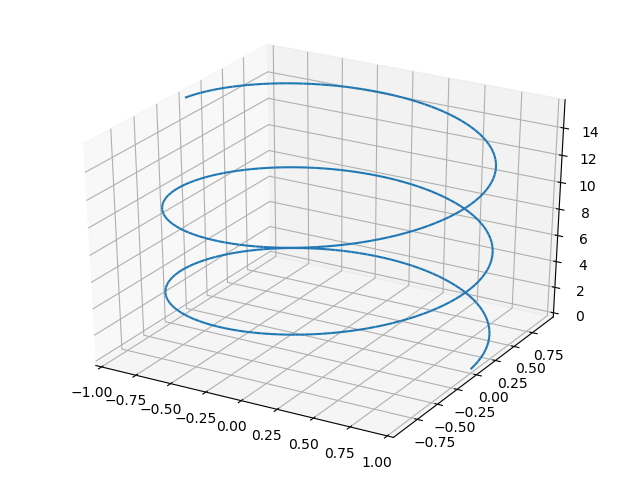

In [7]:
plot3d_parametric_line(*curv1, (t,0,5*pi))

Now it s important to have a function to scalar product

In [8]:
def dot(x,y):
    assert len(x)==len(y), "Two vectors must have the same dimension" 
    result = 0
    for i in range(len(x)):
        result += x[i]*y[i]
    return result

Checking the 'dot' function

In [9]:
curv2 = curve(sin(t),-cos(t),t)

In [10]:
dot(curv1,curv2)

t**2

As we now a curve is made of infinite points. By substituting a value for the parameter of the curve we can find the point associated to this parameter. In the below we have a function that find the associated point in the space with a given parameter. 

In [60]:
def substitute(f,*args):
    '''
    the number of the variables of the vectorial function 'f' must be eqaul to the given parameters.
    Example:
    substitute((cos(t),sin(t),t),(t,pi))
    
    '''
    parameters = set()
    result=[]
    for component in f:
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
        
            
        
    assert len(args)==len(parameters), "Error: the number of given parameters isn't equal to the number of variables of the function"
    
    # Here we call the component of the curve one-by-one and substitute the free variables by given parameteres. 
    for component in f:
        if not isinstance(component,tuple(core.all_classes)):
            result.append(component)
            continue
        for variable in args:
            component = component.subs(variable[0],variable[1])
        result.append(component)
    return tuple(result) 

Checking the above function

In [61]:
substitute(curv1,(t,2))

(cos(2), sin(2), 2)

In [58]:
curv3 = curve(cos(t),sin(t),2)

In [62]:
substitute(curv3,(t,2))

(cos(2), sin(2), 2)

# Parametrized Surfaces

First of all we have to define a function that create a parametrized surface. As we know a parametrized surface has two parameteres. 

In [63]:
def surface(x,y,z):
    return x,y,z

Checking the above function

In [64]:
surf1 = surface(v*cos(u), v*sin(u),u)

We can plot it easily but using the module 'plot3d_parametric_surface'. Again note the '*' before the first argument of the function.

<IPython.core.display.Javascript object>


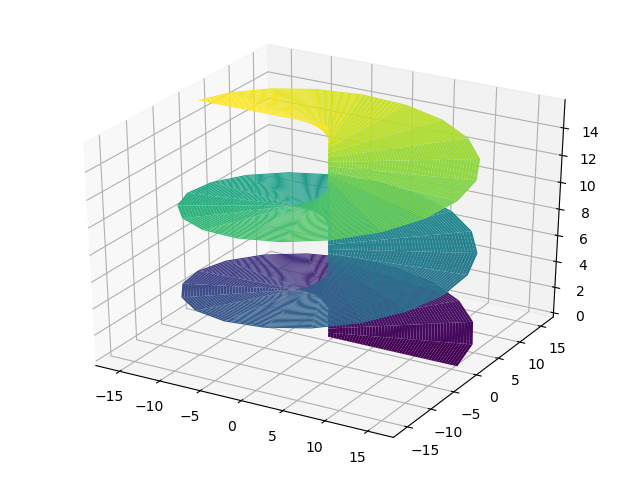

In [65]:
plot3d_parametric_surface(*surf1, (u,0,5*pi),(v,0,5*pi))